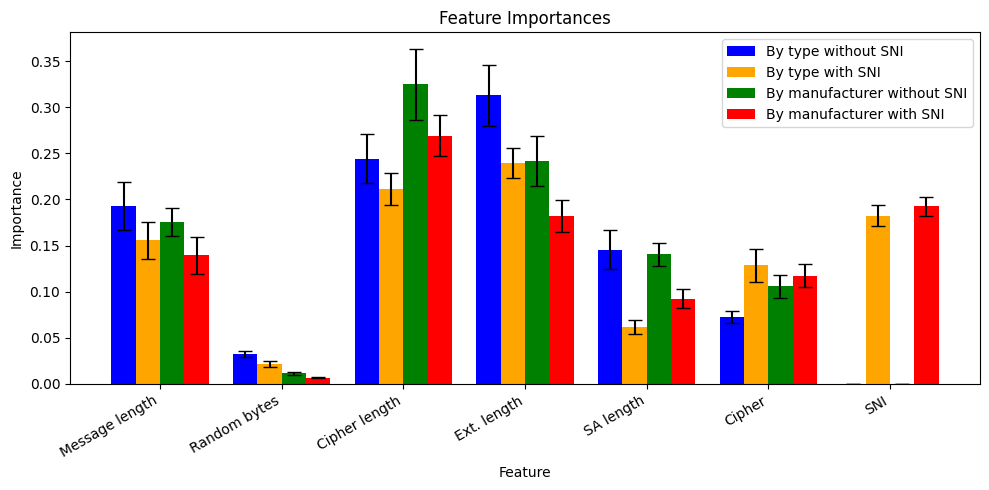

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

files = {
    "By type without SNI": "/content/noSNI-TYPe-RF.csv",
    "By type with SNI": "/content/SNI-TYPe-RF.csv",
    "By manufacturer without SNI": "/content/noSNI-MANF-RF.csv",
    "By manufacturer with SNI": "/content/SNI-MANF-RF.csv",
}


correct_feature_order = [
    "Message length",
    "Random bytes",
    "Cipher length",
    "Ext. length",
    "SA length",
    "Cipher",
    "SNI"
]

data = {}

for key, file in files.items():
    df = pd.read_csv(file, header=None, dtype={0: str})
    if df.iloc[0, 0] == "Feature":
        df = df.iloc[1:].reset_index(drop=True)
    df.columns = ["Feature", "Importance", "Std"]
    df["Importance"] = pd.to_numeric(df["Importance"], errors="coerce").fillna(0)
    df["Std"] = pd.to_numeric(df["Std"], errors="coerce").fillna(0)
    df["Feature"] = range(df.shape[0])
    if df.shape[0] == 6:
        df = pd.concat([df, pd.DataFrame([[6, 0, 0]], columns=df.columns)], ignore_index=True)


    elif df.shape[0] >= 7:
        temp_row = df.loc[4].copy()
        df.loc[4] = df.loc[6]
        df.loc[6] = temp_row
    df["Feature"] = correct_feature_order
    data[key] = df


features = correct_feature_order
importances = {key: np.array(data[key]["Importance"], dtype=float) for key in data}
std_devs = {key: np.array(data[key]["Std"], dtype=float) for key in data}
colors = ["blue", "orange", "green", "red"]
x = np.arange(len(features))
width = 0.2
fig, ax = plt.subplots(figsize=(10, 5))
for i, (label, color) in enumerate(zip(files.keys(), colors)):
    ax.bar(
        x + i * width,
        importances[label],
        width,
        yerr=std_devs[label],
        label=label,
        color=color,
        capsize=5,
    )

ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(features, rotation=30, ha="right")
ax.set_ylabel("Importance")
ax.set_xlabel("Feature")
ax.set_title("Feature Importances")
ax.legend()

plt.tight_layout()
plt.savefig("/content/feature_importance.pdf", format="pdf")

plt.show()
